# DATA GATHERING

In [144]:
#import all the necessary packages
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns


In [145]:
import matplotlib.pyplot as plt
from scipy import stats
import statistics as staticmethod
from scipy.stats import f_oneway
from matplotlib.ticker import StrMethodFormatter 


## Questions

1. What are the most common funding sources or investors in these years?
2. Which sector receive funding more?
3. Which  company Brand get more funding?
4. What is the correlation between amount of funds received and the stage/age of the start up?
5. Is the geographic location of a startup's headquarters a factor that impacts the funding it secures?

In [146]:
environment_variables = dotenv_values('.env')
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection"

In [147]:
connection = pyodbc.connect(connection_string)

In [148]:
#querying data for 2020 from DB

query = "Select * from LP1_startup_funding2020"

data = pd.read_sql(query, connection)

In [149]:
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


# DATA CLEANING

* Checking for Duplicates
* Missing data
* Column names(Inconsistent)
* Data types
* Unwanted columns
* Data mismatch

### 2020 DATA

#### Checking for missing data

In [150]:
data.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

#### Checking for duplicate data

In [151]:
data.duplicated("Company_Brand").sum()

150

In [152]:
data.shape

(1055, 10)

In [153]:
#droppong the duplicates
data_drop_dup = data.drop_duplicates('Company_Brand')

In [154]:
data_drop_dup.shape

(905, 10)

In [155]:
data_drop_dup.isnull().sum()

Company_Brand      0
Founded          168
HeadQuarter       78
Sector             6
What_it_does       0
Founders          12
Investor          37
Amount           230
Stage            398
column10         903
dtype: int64

In [156]:
#drop column10
data_drop_dup = data_drop_dup.drop('column10', axis=1)

In [157]:
data_drop_dup.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

In [158]:
data_drop_dup.tail(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1043,Quicko,NaN,Ahmedabad,Taxation,Online tax planning and filing platform,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter",280000.0,None
1044,Satin Creditcare,NaN,Gurgaon,Fintech,A micro finance company,None,Austrian Bank,15000000.0,None
1045,XpressBees,2015.0,None,Logistics,Provides end to end supply chain solutions,"Supam Maheshwari, Amitava Saha",Alibaba,10000000.0,None
1046,FarmERP,2001.0,Pune,Agritech,Smart agriculture management ERP software plat...,"Santosh Shinde, Sanjay Borkar",TechnoGen,NaN,Series A
1047,Wealth Bucket,2018.0,None,Fintech,An online platform for mutual fund investments,"Himanshu Jain, Pulkit Jain","NorthStar, Vinod Khatumal",3000000.0,None
1049,Fashor,2017.0,Chennai,Fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre Series A
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A


In [159]:
#determine the mean for the amount column
#data_drop_dup['Amount'].mean()

In [160]:
#replace missing Amount with 0
data_drop_dup['Amount'] = data_drop_dup['Amount'].fillna(0)

In [161]:
data_drop_dup.tail(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1043,Quicko,NaN,Ahmedabad,Taxation,Online tax planning and filing platform,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter",280000.0,None
1044,Satin Creditcare,NaN,Gurgaon,Fintech,A micro finance company,None,Austrian Bank,15000000.0,None
1045,XpressBees,2015.0,None,Logistics,Provides end to end supply chain solutions,"Supam Maheshwari, Amitava Saha",Alibaba,10000000.0,None
1046,FarmERP,2001.0,Pune,Agritech,Smart agriculture management ERP software plat...,"Santosh Shinde, Sanjay Borkar",TechnoGen,0.0,Series A
1047,Wealth Bucket,2018.0,None,Fintech,An online platform for mutual fund investments,"Himanshu Jain, Pulkit Jain","NorthStar, Vinod Khatumal",3000000.0,None
1049,Fashor,2017.0,Chennai,Fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre Series A
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A


In [162]:
data_drop_dup.isnull().sum()

Company_Brand      0
Founded          168
HeadQuarter       78
Sector             6
What_it_does       0
Founders          12
Investor          37
Amount             0
Stage            398
dtype: int64

In [163]:
#replaceing the missing stage with mode stage for the year
mode_value_0 = data_drop_dup['Stage'].mode()[0]
mode_value_0

'Series A'

In [164]:
#replace the missing stages with the most repeated stage
data_drop_dup['Stage'].fillna(mode_value_0, inplace=True)

In [165]:
data_drop_dup.isnull().sum()

Company_Brand      0
Founded          168
HeadQuarter       78
Sector             6
What_it_does       0
Founders          12
Investor          37
Amount             0
Stage              0
dtype: int64

In [166]:
mode_value20 = data_drop_dup['Founded'].mode()[0]

#replace the missing years with the most repeated year
data_drop_dup['Founded'].fillna(mode_value20, inplace=True)
data_drop_dup.isnull().sum()

Company_Brand     0
Founded           0
HeadQuarter      78
Sector            6
What_it_does      0
Founders         12
Investor         37
Amount            0
Stage             0
dtype: int64

In [167]:
#convert founded column to int
data_drop_dup['Founded'] = data_drop_dup['Founded'].astype(int)

In [168]:
data_drop_dup.isnull().sum()

Company_Brand     0
Founded           0
HeadQuarter      78
Sector            6
What_it_does      0
Founders         12
Investor         37
Amount            0
Stage             0
dtype: int64

### 2021 Data

In [169]:
#querying data for 2021 from DB

query = "Select * from LP1_startup_funding2021"

data_21 = pd.read_sql(query, connection)

In [170]:
data_21.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None


In [171]:
data_21.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [172]:
#finding the total duplicate in Company_Brand column
data_21.duplicated("Company_Brand").sum()

176

In [173]:
data_21.shape

(1209, 9)

In [174]:
#drop the duplicates
data_drop_dup_21 = data_21.drop_duplicates('Company_Brand')

In [175]:
data_drop_dup_21.shape

(1033, 9)

In [176]:
data_drop_dup_21.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          58
Amount             3
Stage            366
dtype: int64

In [177]:
data_drop_dup_21.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [178]:
#removing the "$" sign in the amount column
data_drop_dup_21['Amount'] = data_drop_dup_21['Amount'].str.replace("$","")
data_drop_dup_21.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","2,000,000",Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"188,000,000",None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","200,000",None
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"1,000,000",None


In [179]:
#removing the commas in the Amounts column
data_drop_dup_21['Amount'] = data_drop_dup_21['Amount'].str.replace(",","")
data_drop_dup_21.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000,None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",200000,None
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000,None


In [180]:
#finding the unique values in the Amount column
unique_values_21 = data_drop_dup_21['Amount'].unique()
unique_values_21

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'Undisclosed', '1000000', '3000000',
       '100000', '700000', '9000000', '40000000', '49000000', '400000',
       '300000', '25000000', '160000000', '150000', '1800000', '5000000',
       '850000', '53000000', '500000', '1100000', '6000000', '800000',
       '10000000', '21000000', '7500000', '26000000', '7400000',
       '1500000', '600000', '800000000', '17000000', '3500000',
       '15000000', '215000000', '2500000', '350000000', '5500000',
       '83000000', '110000000', '500000000', '65000000', '150000000000',
       '300000000', '2200000', '140000000', '4000000', '13000000', None,
       '9500000', '8000000', 'Upsparks', '12000000', '1700000',
       '150000000', '100000000', '225000000', '6700000', '1300000',
       '20000000', '250000', '52000000', '3800000', '17500000',
       '42000000', '2300000', '7000000', '450000000', '8500000',
       '37000000', '44000000', '770000', '12500

In [181]:
#seperate text and digits for the amounts column
data_drop_dup_21['numbers'] = data_drop_dup_21['Amount'].str.extract('(\d+)', expand=False)
data_drop_dup_21['text'] = data_drop_dup_21['Amount'].str.extract('([^\d]+)', expand=False)

In [182]:
data_drop_dup_21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,numbers,text
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,1200000,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,120000000,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,30000000,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,51000000,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2000000,NaN


In [183]:
data_drop_dup_21['text'].unique()

array([nan, 'Undisclosed', None, 'Upsparks', 'Series C', 'Seed',
       'undisclosed', 'ah! Ventures', 'Pre-series A',
       'ITO Angel Network LetsVenture', 'JITO Angel Network LetsVenture'],
      dtype=object)

In [184]:
#drop Amount Column
data_drop_dup_21 = data_drop_dup_21.drop('Amount', axis=1)

In [185]:
data_drop_dup_21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Stage,numbers,text
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",Pre-series A,1200000,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",None,120000000,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",Series D,30000000,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",Series C,51000000,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",Seed,2000000,NaN


In [186]:
#rename numbers column to Amount
data_drop_dup_21.rename(columns = {'numbers':'Amount'},inplace=True)

In [187]:
print(data_drop_dup_21.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Stage', 'Amount', 'text'],
      dtype='object')


In [188]:
#convert Amount into float
data_drop_dup_21['Amount'] = data_drop_dup_21['Amount'].astype(float)

In [189]:
data_drop_dup_21.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          58
Stage            366
Amount           142
text             895
dtype: int64

In [190]:
data_drop_dup_21.shape

(1033, 10)

In [191]:
#data_drop_dup_21['Amount'].mean()

In [192]:
#replace missing Amount with 0
data_drop_dup_21['Amount'] = data_drop_dup_21['Amount'].fillna(0)

In [193]:
data_drop_dup_21.head(20)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Stage,Amount,text
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",Pre-series A,1200000.0,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",None,120000000.0,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",Series D,30000000.0,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",Series C,51000000.0,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",Seed,2000000.0,NaN
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,None,188000000.0,NaN
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",None,200000.0,NaN
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Pre-series A,0.0,Undisclosed
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,None,0.0,Undisclosed
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,None,1000000.0,NaN


In [194]:
data_drop_dup_21.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          58
Stage            366
Amount             0
text             895
dtype: int64

In [195]:
# Find the mode of the Stage column
mode_value1 = data_drop_dup_21['Stage'].mode()[0]
mode_value1

'Seed'

In [196]:
#replace the missing stages with the most repeated stage
data_drop_dup_21['Stage'].fillna(mode_value1, inplace=True)

In [197]:
data_drop_dup_21.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          58
Stage              0
Amount             0
text             895
dtype: int64

In [198]:
#drop text Column
data_drop_dup_21 = data_drop_dup_21.drop('text', axis=1)

In [199]:
data_drop_dup_21.isnull().sum()

Company_Brand     0
Founded           1
HeadQuarter       1
Sector            0
What_it_does      0
Founders          4
Investor         58
Stage             0
Amount            0
dtype: int64

In [200]:
#convert founded column to int
#data_drop_dup_21['Founded'] = data_drop_dup_21['Founded'].astype(int)

In [201]:
data_drop_dup_21.isnull().sum()

Company_Brand     0
Founded           1
HeadQuarter       1
Sector            0
What_it_does      0
Founders          4
Investor         58
Stage             0
Amount            0
dtype: int64

### 2019 DATA

In [202]:
#read in the data
df_19 = pd.read_csv('startup_funding2019.csv')
df_19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [203]:
#renaming the column names
df_19.rename(columns = {'Company/Brand':'Company_Brand'},inplace=True)
df_19.rename(columns = {'What it does':'What_it_does'},inplace=True)
df_19.rename(columns = {'Amount($)':'Amount'},inplace=True)
df_19.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [204]:
#checking for duplicates
df_19.duplicated("Company_Brand").sum()

2

In [205]:
df_19.shape

(89, 9)

In [206]:
#delete the duplicates
data_19= df_19.drop_duplicates('Company_Brand')

In [207]:
data_19.shape

(87, 9)

In [208]:
#checking for missing values
data_19.isnull().sum()

Company_Brand     0
Founded          28
HeadQuarter      19
Sector            5
What_it_does      0
Founders          3
Investor          0
Amount            0
Stage            46
dtype: int64

In [209]:
data_19.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [210]:
#converting amount column to float
#removing the "$" sign in the amount column
data_19['Amount'] = data_19['Amount'].str.replace("$","")
data_19.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"6,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","1,000,000",Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"20,000,000",Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"275,000,000",Series G


In [211]:
#removing the "," sign in the amount column
data_19['Amount'] = data_19['Amount'].str.replace(",","")
data_19.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000,Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000,Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000,Series G


In [212]:
#finding the unique values in the Amount column
unique_values_19 = data_19['Amount'].unique()
unique_values_19

array(['6300000', '150000000', '28000000', '30000000', '6000000',
       'Undisclosed', '1000000', '20000000', '275000000', '22000000',
       '5000000', '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000', '600000',
       '70000000', '60000000', '220000', '2800000', '2100000', '7000000',
       '311000000', '4800000', '693000000', '33000000'], dtype=object)

In [213]:
#seperate text and digits for the amount column
data_19['numbers'] = data_19['Amount'].str.extract('(\d+)', expand=False)
data_19['text'] = data_19['Amount'].str.extract('([^\d]+)', expand=False)
data_19.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,numbers,text
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN,6300000,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C,150000000,NaN
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding,28000000,NaN
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D,30000000,NaN
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN,6000000,NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN,NaN,Undisclosed
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN,NaN,Undisclosed
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000,Pre series A,1000000,NaN
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000,Series A,20000000,NaN
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000,Series G,275000000,NaN


In [214]:
#drop Amount Column
data_19 = data_19.drop('Amount', axis=1)

In [215]:
#rename numbers column to Amount
data_19.rename(columns = {'numbers':'Amount'},inplace=True)

In [216]:
data_19.isnull().sum()

Company_Brand     0
Founded          28
HeadQuarter      19
Sector            5
What_it_does      0
Founders          3
Investor          0
Stage            46
Amount           12
text             75
dtype: int64

In [217]:
#drop text Column
data_19 = data_19.drop('text', axis=1)

In [218]:
#convert amount column to float
data_19['Amount'] = data_19['Amount'].astype(float)

In [219]:
#the mean amount for that year
#data_19['Amount'].mean()

In [220]:
#replace missing Amount with 0
data_19['Amount'] = data_19['Amount'].fillna(0)

In [221]:
data_19.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Stage,Amount
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,NaN,6300000.0
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,Series C,150000000.0
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",Fresh funding,28000000.0
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",Series D,30000000.0
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),NaN,6000000.0
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,0.0
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,0.0
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",Pre series A,1000000.0
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,Series A,20000000.0
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,Series G,275000000.0


In [222]:
mode_value19 = data_19['Stage'].mode()[0]
mode_value19

'Series A'

In [223]:
#replace the missing staes with the most repeated stage for that year
data_19['Stage'].fillna(mode_value19, inplace=True)

In [224]:
data_19.isnull().sum()

Company_Brand     0
Founded          28
HeadQuarter      19
Sector            5
What_it_does      0
Founders          3
Investor          0
Stage             0
Amount            0
dtype: int64

In [225]:
data_19.shape

(87, 9)

In [226]:
data_19.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Stage             object
Amount           float64
dtype: object

In [227]:
#convert founded column to int
#data_19['Founded'] = data_19['Founded'].astype(int)

In [228]:
data_19.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Stage             object
Amount           float64
dtype: object

In [229]:
data_19.isnull().sum()

Company_Brand     0
Founded          28
HeadQuarter      19
Sector            5
What_it_does      0
Founders          3
Investor          0
Stage             0
Amount            0
dtype: int64

### 2018 DATA

In [230]:
#read the data in
df_18 = pd.read_csv('startup_funding2018.csv')
df_18.tail(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company
516,LT Foods,"Food and Beverage, Food Processing, Manufacturing",Post-IPO Equity,"₹1,400,000,000","New Delhi, Delhi, India",LT Foods believe that nature will continue to ...
517,Multibashi,"E-Learning, Internet",Seed,"₹10,000,000","Bengaluru, Karnataka, India",Free language learning platform.
518,Cleardekho,"Eyewear, Internet",Venture - Series Unknown,—,"Ghaziabad, Uttar Pradesh, India",Uttar Pradesh based online eyewear marketplace.
519,Dailyhunt,"Information Technology, Mobile, News, Operatin...",Series E,6000000,"Bangalore, Karnataka, India",NewsHunt is a Bangalore based eBooks company.
520,SlicePay,"FinTech, Internet, Payments, Service Industry",Series A,14900000,"Bengaluru, Karnataka, India",SlicePay is an AI based instant credit app for...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [231]:
#re-name the column names
df_18.rename(columns = {'Company Name':'Company_Brand'},inplace=True)
df_18.rename(columns = {'Industry':'Sector'},inplace=True)
df_18.rename(columns = {'Round/Series':'Stage'},inplace=True)
df_18.rename(columns = {'Location':'HeadQuarter'},inplace=True)
df_18.rename(columns = {'About Company':'What_it_does'},inplace=True)
df_18.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [232]:
#identify duplicates
df_18.duplicated("Company_Brand").sum()

1

In [233]:
df_18.shape

(526, 6)

In [234]:
#delete the duplicates
data_18= df_18.drop_duplicates('Company_Brand')

In [235]:
data_18.shape

(525, 6)

In [236]:
#check for missing values
data_18.isnull().sum()

Company_Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What_it_does     0
dtype: int64

In [237]:
#check for data types
data_18.dtypes

Company_Brand    object
Sector           object
Stage            object
Amount           object
HeadQuarter      object
What_it_does     object
dtype: object

In [238]:
#converting amount column to float

#remove the commas
data_18['Amount'] = data_18['Amount'].str.replace(",","")
# seperate the sybols from the digits in the amount column
data_18['Amount_Digits'] = data_18['Amount'].str.extract('(\d+)')
data_18['Amount_Symbols'] = data_18['Amount'].str.extract('(\D+)')
data_18.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Amount_Digits,Amount_Symbols
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹40000000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,40000000,₹
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹65000000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,65000000,₹
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,—


In [239]:
#determine the unique values in the amount_symbols column
unique_values_18 = data_18['Amount_Symbols'].unique()
unique_values_18

array([nan, '₹', '—', '$'], dtype=object)

In [240]:
#convert amount column to float
data_18['Amount_Digits'] = data_18['Amount_Digits'].astype(float)

In [241]:
# Conversion rate from rupees to dollars
rupee_to_dollar_rate = 0.013

# Convert Amount to dollars where Amount_Symbol is 'rupee'
data_18['Amount_Digits'] = np.where(data_18['Amount_Symbols'] == '₹',
                        data_18['Amount_Digits'] * rupee_to_dollar_rate,
                        data_18['Amount_Digits'])

# Drop the Amount_Symbol column 
data_18= data_18.drop('Amount_Symbols', axis=1)

data_18.head(10)

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Amount_Digits
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹40000000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,520000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹65000000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,845000.0
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,1600000.0
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,₹16000000,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,208000.0
7,Hyperdata.IO,Market Research,Angel,₹50000000,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,650000.0
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,NaN
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,NaN


In [242]:
#drop Amount Column
data_18 = data_18.drop('Amount', axis=1)
data_18

,Company_Brand,Sector,Stage,HeadQuarter,What_it_does,Amount_Digits
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,520000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,845000.0
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",225000000.0
522,Happyeasygo Group,"Tourism, Travel",Series A,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,7500.0
524,Droni Tech,Information Technology,Seed,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,455000.0


In [243]:
data_18.rename(columns = {'Amount_Digits':'Amount'},inplace=True)
data_18.head()

,Company_Brand,Sector,Stage,HeadQuarter,What_it_does,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,520000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,845000.0
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN


In [244]:
#Creating the founded year
data_18['Founded'] = None
data_18.head()

,Company_Brand,Sector,Stage,HeadQuarter,What_it_does,Amount,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0,None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,520000.0,None
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,845000.0,None
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,None


In [245]:
data_18.dtypes

Company_Brand     object
Sector            object
Stage             object
HeadQuarter       object
What_it_does      object
Amount           float64
Founded           object
dtype: object

In [246]:
#replace missing Amount with 0
data_18['Amount'] = data_18['Amount'].fillna(0)

In [247]:
data_18.head()

,Company_Brand,Sector,Stage,HeadQuarter,What_it_does,Amount,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0,None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,520000.0,None
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,845000.0,None
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,0.0,None


In [248]:
data_18.isnull().sum()

Company_Brand      0
Sector             0
Stage              0
HeadQuarter        0
What_it_does       0
Amount             0
Founded          525
dtype: int64

### COMBINED CLEAN DATA

In [249]:
#concatenate the data into one dataframe
df_all=pd.concat([data_drop_dup,data_drop_dup_21,data_19,data_18])
df_all.to_csv('all_data.csv')

In [250]:
#read in all the data
df_all.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0.0,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A
5,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed
6,MyClassboard,2008.0,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A
7,Metvy,2018.0,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,0.0,Pre-series
8,Rupeek,2015.0,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C
9,Gig India,2017.0,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A


In [251]:
df_all.shape

(2550, 9)

In [252]:
df_all.info

<bound method DataFrame.info of          Company_Brand  Founded                  HeadQuarter  \
0           Aqgromalin   2019.0                      Chennai   
1             Krayonnz   2019.0                    Bangalore   
2         PadCare Labs   2018.0                         Pune   
3                NCOME   2020.0                    New Delhi   
4           Gramophone   2016.0                       Indore   
..                 ...      ...                          ...   
521              Udaan      NaN  Bangalore, Karnataka, India   
522  Happyeasygo Group      NaN      Haryana, Haryana, India   
523             Mombay      NaN   Mumbai, Maharashtra, India   
524         Droni Tech      NaN   Mumbai, Maharashtra, India   
525            Netmeds      NaN   Chennai, Tamil Nadu, India   

                                               Sector  \
0                                            AgriTech   
1                                              EdTech   
2                           

In [253]:
df_all.isnull().sum()

Company_Brand      0
Founded          554
HeadQuarter       98
Sector            11
What_it_does       0
Founders         544
Investor         620
Amount             0
Stage              0
dtype: int64

#### Replacing the Founded column missing values with random values from that very column of the non-missing values
Why this method has been chosen for filling in missing values for the founded column is because there is less distortion in data variance, and it also preserves the original distribution of the data, which is not the case for mean, median, and more.

In [254]:
#Replace missing values with random samples from the non-missing values
# Get non-missing values in the column
non_missing_values = df_all['Founded'].dropna()

# Get the number of missing values in the column
num_missing = df_all['Founded'].isnull().sum()

# Generate random samples from non-missing values to fill in missing values
random_samples = np.random.choice(non_missing_values, num_missing, replace=True)

# Replace missing values with random samples
df_all.loc[df_all['Founded'].isnull(), 'Founded'] = random_samples

In [255]:
df_all.isnull().sum()

Company_Brand      0
Founded            0
HeadQuarter       98
Sector            11
What_it_does       0
Founders         544
Investor         620
Amount             0
Stage              0
dtype: int64

In [258]:
#convert founded column to int
df_all['Founded'] = df_all['Founded'].astype(int)

In [259]:
df_all.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0.0,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A


## DATA EXPLORATION

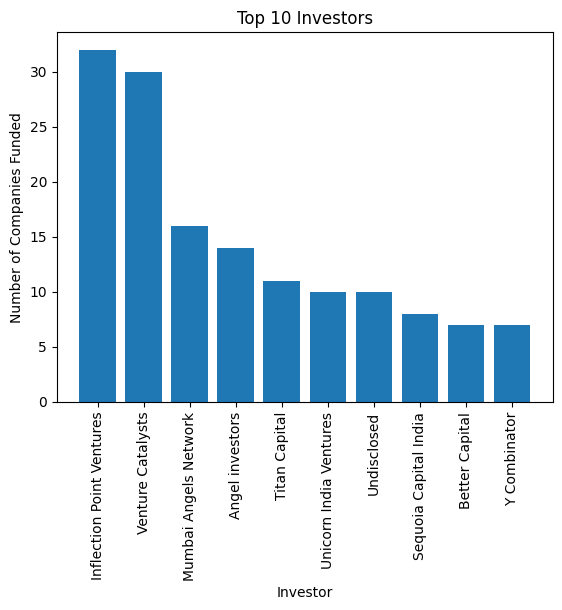

In [256]:
# What are the most common funding sources or investors in these years?
#group the dta by funders
grouped_df = df_all.groupby("Investor")
# Calculate the number of companies that received funding from each investor.
count_df = grouped_df.size().to_frame(name="Count").reset_index()
# Sort the DataFrame by the number of companies in descending order.
sorted_df = count_df.sort_values(by=["Count"], ascending=False)

# Extract the top 10 investors and the number of companies funded by each investor.
top_10_investors = sorted_df["Investor"].head(10)
top_10_investor_counts = sorted_df["Count"].head(10)

# Create a bar chart.
plt.bar(top_10_investors, top_10_investor_counts, align="center")

# Rotate the x-axis labels to 45 degrees.
plt.xticks(rotation=90)

# Set the chart title and axis labels.
plt.title("Top 10 Investors")
plt.xlabel("Investor")
plt.ylabel("Number of Companies Funded")

# Show the chart.
plt.show()

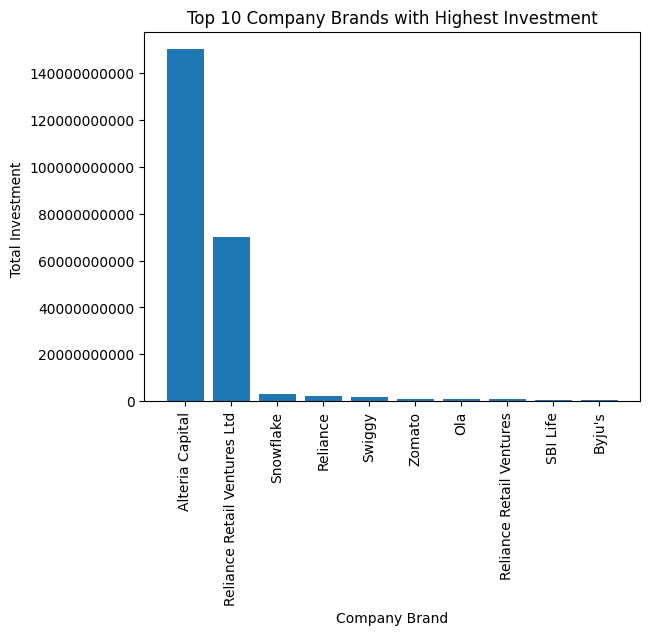

In [260]:
#Which  company Brand get more funding?

# Calculate the total investment for each company brand.
total_investment_df = df_all.groupby("Company_Brand")["Amount"].sum().to_frame().reset_index()

# Sort the DataFrame by the total investment in descending order.
sorted_df = total_investment_df.sort_values(by=["Amount"], ascending=False)

# Extract the top 10 company brands and the total investment for each company brand.
top_10_company_brands = sorted_df["Company_Brand"].head(10)
top_10_company_brand_investments = sorted_df["Amount"].head(10)

# Create a formatter to format the y-axis labels as strings.
formatter = StrMethodFormatter('{x:.0f}')

# Create a bar chart.
bars = plt.bar(top_10_company_brands, top_10_company_brand_investments)

# Set the y-axis formatter to the formatter created above.
plt.gca().yaxis.set_major_formatter(formatter)  # Use plt.gca() instead of ax
# Rotate the x-axis labels to 90 degrees.
plt.xticks(rotation=90)

# Set the chart title and axis labels.
plt.title("Top 10 Company Brands with Highest Investment")
plt.xlabel("Company Brand")
plt.ylabel("Total Investment ")

# Show the chart.
plt.show()

